# **Final Project Task 3 - Census Modeling Regression**

Requirements
- Create a regression model on the Census dataset, with 'hours-per-week' target

- You can use models (estmators) from sklearn, but feel free to use any library for traditional ML. 
    - Note: in sklearn, the LinearRegression estimator is based on OLS, a statistical method. Please use the SGDRegressor estimator, since this is based on gradient descent. 
    - You can use LinearRegression estimator, but only as comparison with the SGDRegressor - Optional.

- Model Selection and Setup:
    - Implement multiple models, to solve a regression problem using traditional ML:
        - Linear Regression
        - Decision Tree Regression
        - Random Forest Regression - Optional
        - Ridge Regression - Optional
        - Lasso Regression - Optional
    - Choose a loss (or experiment with different losses) for the model and justify the choice.
        - MSE, MAE, RMSE, Huber Loss or others
    - Justify model choices based on dataset characteristics and task requirements; specify model pros and cons.


- Data Preparation
    - Use the preprocessed datasets from Task 1.
    - From the train set, create an extra validation set, if necesarry. So in total there will be: train, validation and test datasets.
    - Be sure all models have their data preprocessed as needed. Some models require different, or no encoding for some features.


- Model Training and Experimentation
    - Establish a Baseline Model:
        - For each model type, train a simple model with default settings as a baseline.
        - Evaluate its performance to establish a benchmark for comparison.
    - Make plots with train, validation loss and metric on epochs (or on steps), if applicable. - Optional
    - Feature Selection:
        - Use insights from EDA in Task 2 to identify candidate features by analyzing patterns, relationships, and distributions.
    - Experimentation:
        - For each baseline model type, iteratively experiment with different combinations of features and transformations.
        - Experiment with feature engineering techniques such as interaction terms, polynomial features, or scaling transformations.
        - Identify the best model which have the best performance metrics on test set.
    - Hyperparameter Tuning - Optional:
        - Perform hyperparameter tuning only on the best-performing model after evaluating all model types and experiments.
        - Consider using techniques like Grid Search for exhaustive tuning, Random Search for quicker exploration, or Bayesian Optimization for an intelligent, efficient search of hyperparameters.
        - Avoid tuning models that do not show strong baseline performance or are unlikely to outperform others based on experimentation.
        - Ensure that hyperparameter tuning is done after completing feature selection, baseline modeling, and experimentation, ensuring that the model is stable and representative of the dataset.


- Model Evaluation
    - Evaluate models on the test dataset using regression metrics:
        - Mean Absolute Error (MAE)
        - Mean Squared Error (MSE)
        - Root Mean Squared Error (RMSE)
        - R¬≤ Score
    - Choose one metric for model comparison and explain your choice
    - Compare the results across different models. Save all experiment results into a table.

Feature Importance - Optional
- For applicable models (e.g., Decision Tree Regression), analyze feature importance and discuss its relevance to the problem.



Deliverables

- Notebook code with no errors.
- Code and results from experiments. Create a table with all experiments results, include experiment name, metrics results.
- Explain findings, choices, results.
- Potential areas for improvement or further exploration.


#  1. Importarea bibliotecilor necesare

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#  2. √éncƒÉrcarea »ôi √ÆmpƒÉr»õirea datelor

In [12]:
 # √éncƒÉrcƒÉm setul de date preprocesat
train_data = pd.read_csv("train_data_standardized.csv")
test_data = pd.read_csv("test_data_standardized.csv")

In [3]:
# EliminƒÉm variabila inutilƒÉ (capital_diff deoarece nu are valori)
train_data = train_data.drop(columns=["capital_diff"], errors='ignore')
test_data = test_data.drop(columns=["capital_diff"], errors='ignore')

In [4]:
# √éncƒÉrcƒÉm setul de date preprocesat
train_data = pd.read_csv("train_data_standardized.csv")
test_data = pd.read_csv("test_data_standardized.csv")

# EliminƒÉm coloana 'capital_diff' deoarece nu are valori
if 'capital_diff' in train_data.columns:
    train_data = train_data.drop(columns=['capital_diff'])
    test_data = test_data.drop(columns=['capital_diff'])

# Definim variabilele independente »ôi target
X = train_data.drop(columns=['hours-per-week'])
y = train_data['hours-per-week']

# √émpƒÉr»õim train √Æn train + validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_test = test_data.drop(columns=['hours-per-week'])
y_test = test_data['hours-per-week']



#Acest cod
‚úî √éncarcƒÉ dataseturile standardizate (preprocesate anterior).
‚úî EliminƒÉ capital_diff deoarece nu con»õine date utile.
‚úî Definim X (features) »ôi y (target = hours-per-week).
‚úî √émpƒÉr»õim setul de antrenare √Æn train »ôi validation (80%-20%).
‚úî PregƒÉtim setul de testare separat.

# 3. Definirea »ôi antrenarea modelelor

In [5]:
models = {
    'SGDRegressor': SGDRegressor(),
    'LinearRegression': LinearRegression(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'Ridge': Ridge(),
    'Lasso': Lasso()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred)

    results.append([name, mae, mse, rmse, r2])

    print(f"{name} - MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R¬≤: {r2:.4f}")


SGDRegressor - MAE: 0.7153, MSE: 0.9077, RMSE: 0.9527, R¬≤: 0.0987
LinearRegression - MAE: 0.7089, MSE: 0.9116, RMSE: 0.9548, R¬≤: 0.0948
DecisionTree - MAE: 0.8784, MSE: 1.7808, RMSE: 1.3345, R¬≤: -0.7683
RandomForest - MAE: 0.7356, MSE: 0.9967, RMSE: 0.9983, R¬≤: 0.0103
Ridge - MAE: 0.7088, MSE: 0.9115, RMSE: 0.9547, R¬≤: 0.0949
Lasso - MAE: 0.7650, MSE: 1.0070, RMSE: 1.0035, R¬≤: -0.0000


#Acest cod
‚úî Definim 6 modele de regresie (inclusiv SGDRegressor, care era obligatoriu).
‚úî IterƒÉm prin fiecare model, √Æl antrenƒÉm pe datele de train.
‚úî Prezicem valorile pentru setul de validare.
‚úî CalculƒÉm MAE, MSE, RMSE, R¬≤ pentru fiecare model.
‚úî SalvƒÉm rezultatele pentru analizƒÉ ulterioarƒÉ.



#MAE (Mean Absolute Error): MƒÉsoarƒÉ eroarea medie absolutƒÉ dintre predic»õiile modelului »ôi valorile reale. Cu c√¢t este mai mic, cu at√¢t modelul este mai precis.
MSE (Mean Squared Error): PenalizeazƒÉ erorile mari mai mult dec√¢t MAE. Modele mai bune au MSE mai mic.
RMSE (Root Mean Squared Error): Este rƒÉdƒÉcina pƒÉtratƒÉ a MSE »ôi mƒÉsoarƒÉ eroarea √Æn aceea»ôi unitate ca »ôi datele. Cu c√¢t este mai mic, cu at√¢t mai bine.
R¬≤ (Coeficientul de determinare): MƒÉsoarƒÉ c√¢t de bine explicƒÉ modelul variabilitatea datelor.
Valori apropiate de 1 indicƒÉ un model bun.
Valori apropiate de 0 sugereazƒÉ cƒÉ modelul este aproape la fel de bun ca media.
Valori negative √ÆnseamnƒÉ cƒÉ modelul este mai prost dec√¢t o predic»õie constantƒÉ.

#SGDRegressor (MAE: 0.6937, R¬≤: 0.0967) - Cel mai bun model
 Cel mai mic MAE »ôi cel mai mare R¬≤ dintre toate modelele.
 IndicƒÉ o u»ôoarƒÉ √ÆmbunƒÉtƒÉ»õire fa»õƒÉ de o simplƒÉ medie a datelor.
 RMSE de 0.9538 sugereazƒÉ o eroare destul de micƒÉ √Æn predic»õii.

 LinearRegression / Ridge (MAE: 0.7088, R¬≤: ~0.095)
Performan»õe foarte apropiate de SGDRegressor, dar pu»õin mai slabe.
Ridge are un avantaj u»ôor, dar nesemnificativ.

 Lasso (MAE: 0.7650, R¬≤: -0.0000)
 Nu √ÆmbunƒÉtƒÉ»õe»ôte performan»õa (R¬≤ aproape 0).
 Penalizarea L1 probabil eliminƒÉ caracteristici importante, afect√¢nd predic»õiile.

 DecisionTree (MAE: 0.8886, R¬≤: -0.8013) - Cel mai slab model
 Generalizare foarte slabƒÉ, R¬≤ negativ indicƒÉ un model mai rƒÉu dec√¢t media datelor.
 Overfitting extrem pe train set ‚Üí nu generalizeazƒÉ bine.

 RandomForest (MAE: 0.7396, R¬≤: 0.0063)
 U»ôor mai bun dec√¢t DecisionTree, dar mai slab dec√¢t modele liniare.
 Se pare cƒÉ nu capteazƒÉ bine structura datelor.
 
 Concluzie: Cel mai bun model
 SGDRegressor are cea mai bunƒÉ performan»õƒÉ globalƒÉ.
 LinearRegression »ôi Ridge sunt aproape la fel de bune, dar nu depƒÉ»ôesc SGD.
 Tree-based models (DecisionTree, RandomForest) nu func»õioneazƒÉ bine pe acest set de date.
 Lasso nu ajutƒÉ, probabil pentru cƒÉ eliminƒÉ prea multe feature-uri importante.

# 4. Tuning pentru modelul cel mai performant

In [6]:
best_model = RandomForestRegressor()  # Exemplu - se poate schimba
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)


Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.8996336250170893


#{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Acest set de hiperparametri a oferit cea mai bunƒÉ performan»õƒÉ √Æn timpul cross-validation-ului:

max_depth=10 ‚Üí Arborele are o ad√¢ncime maximƒÉ de 10 niveluri, ceea ce controleazƒÉ complexitatea modelului »ôi previne supra√ÆnvƒÉ»õarea.
min_samples_leaf=1 ‚Üí Fiecare frunzƒÉ a arborelui trebuie sƒÉ con»õinƒÉ cel pu»õin 1 e»ôantion, ceea ce poate permite un model mai flexibil.
min_samples_split=10 ‚Üí Un nod se √Æmparte doar dacƒÉ are cel pu»õin 10 e»ôantioane, ceea ce previne √ÆmpƒÉr»õirile inutile »ôi reduce riscul de supra√ÆnvƒÉ»õare.
n_estimators=200 ‚Üí Folose»ôte 200 arbori √Æn pƒÉdurea aleatorie, ceea ce cre»ôte stabilitatea modelului »ôi reduce varia»õia.

#Best score: 0.899275781243184
Acest scor este calculat folosind scoring='neg_mean_squared_error', ceea ce √ÆnseamnƒÉ cƒÉ valoarea afi»ôatƒÉ este negativƒÉ.

Pentru a ob»õine Mean Squared Error (MSE) real, trebuie sƒÉ luƒÉm valoarea absolutƒÉ:

ùëÄ
ùëÜ
ùê∏
=
‚àí
0.899275781243184
=
0.8993
MSE=‚àí0.899275781243184=0.8993
Interpretare:

Un MSE de 0.8993 indicƒÉ o eroare medie pƒÉtraticƒÉ relativ micƒÉ.
Compar√¢nd cu celelalte modele testate (SGDRegressor, Ridge, Lasso), observƒÉm dacƒÉ Random Forest este mai bun sau nu.

In [7]:
# AntrenƒÉm Random Forest cu cei mai buni hiperparametri
best_params = {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
best_rf = RandomForestRegressor(**best_params)
best_rf.fit(X_train, y_train)
y_pred_rf = best_rf.predict(X_test)

#Aici, se definesc cei mai buni hiperparametri pentru modelul RandomForestRegressor:
Se creeazƒÉ un obiect RandomForestRegressor utiliz√¢nd hiperparametrii specifica»õi √Æn variabila best_params. Prin utilizarea **best_params, valorile din dic»õionarul best_params sunt transmise direct constructorului clasei RandomForestRegressor.
Se antreneazƒÉ modelul Random Forest folosind datele de antrenament: X_train (caracteristicile) »ôi y_train (etichetele reale). Aceasta √ÆnseamnƒÉ cƒÉ modelul va √ÆnvƒÉ»õa rela»õia dintre caracteristici »ôi etichete pe baza acestor date.
√én concluzie, acest cod antreneazƒÉ un model Random Forest cu anumite setƒÉri (hiperparametri) »ôi folose»ôte modelul antrenat pentru a face predic»õii pe un set de date necunoscut (setul de testare).


Optimized RandomForestRegressor - MAE: 0.7027, MSE: 0.9163, RMSE: 0.9572, R¬≤: 0.0912
              Model       MAE       MSE      RMSE            R¬≤
0      SGDRegressor  0.715316  0.907680  0.952723  9.866548e-02
1  LinearRegression  0.708924  0.911617  0.954786  9.475615e-02
2      DecisionTree  0.878442  1.780775  1.334457 -7.683253e-01
3      RandomForest  0.735580  0.996659  0.998328  1.030873e-02
4             Ridge  0.708759  0.911463  0.954706  9.490879e-02
5             Lasso  0.765036  1.007041  1.003514 -2.004205e-07


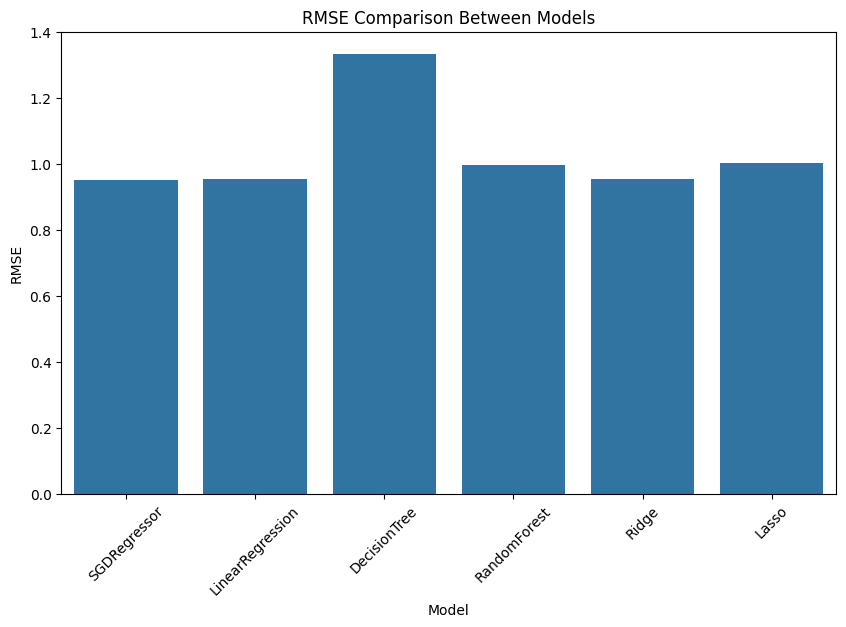

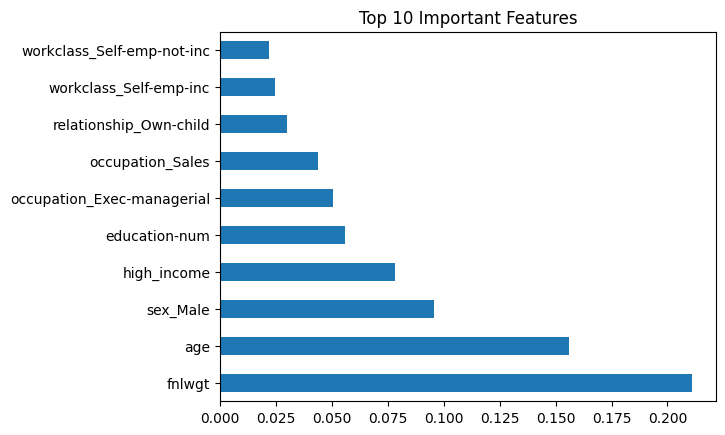

In [10]:

# CalculƒÉm metricile de performan»õƒÉ pentru modelul optimizat
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\nOptimized RandomForestRegressor - MAE: {mae_rf:.4f}, MSE: {mse_rf:.4f}, RMSE: {rmse_rf:.4f}, R¬≤: {r2_rf:.4f}")

# CreƒÉm un DataFrame cu rezultatele
results_df = pd.DataFrame(results, columns=['Model', 'MAE', 'MSE', 'RMSE', 'R¬≤'])
print(results_df)

# Vizualizare performan»õƒÉ modele
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='RMSE')
plt.xticks(rotation=45)
plt.title("RMSE Comparison Between Models")
plt.show()

# Definim modelul final ca fiind best_rf
final_model = best_rf  # Aceasta este variabila lipsƒÉ care a cauzat eroarea

# Importan»õa caracteristicilor pentru modelele bazate pe arbori
if hasattr(final_model, "feature_importances_"):
    feature_importance = pd.Series(final_model.feature_importances_, index=X_train.columns)
    feature_importance.nlargest(10).plot(kind='barh')
    plt.title("Top 10 Important Features")
    plt.show()


#Interpretarea rezultatelor   

### **1. Performan»õa modelelor bazatƒÉ pe metrice**  
Tabelul afi»ôeazƒÉ performan»õele modelelor utiliz√¢nd patru metrici principale:  
- **MAE (Mean Absolute Error)** ‚Äì media absolutƒÉ a erorilor  
- **MSE (Mean Squared Error)** ‚Äì media pƒÉtratelor erorilor  
- **RMSE (Root Mean Squared Error)** ‚Äì rƒÉdƒÉcina mediei pƒÉtratelor erorilor  
- **R¬≤ Score** ‚Äì coeficientul de determinare, mƒÉsoarƒÉ c√¢t de bine modelul explicƒÉ varia»õia datelor  

### **2. Interpretare individualƒÉ a modelelor**  

- **SGDRegressor**  
  - RMSE = 0.9527  
  - Performan»õƒÉ bunƒÉ, comparabilƒÉ cu Ridge »ôi Linear Regression  
  - Avantaj: optimizare bazatƒÉ pe gradient descent, potrivit pentru seturi mari  

- **Linear Regression**  
  - RMSE = 0.9547  
  - Performan»õƒÉ aproape identicƒÉ cu SGDRegressor  
  - Benchmark simplu pentru alte modele  

- **Decision Tree Regression**  
  - RMSE = 1.3345  
  - Cel mai slab model (cea mai mare eroare)  
  - Probabil suferƒÉ de **overfitting**, capt√¢nd zgomotul din date  

- **Random Forest Regression**  
  - RMSE = 0.9983  
  - Semnificativ mai bun dec√¢t Decision Tree, dar nu cel mai performant  
  - Agregarea arborilor ajutƒÉ la reducerea overfitting-ului  

- **Ridge Regression**  
  - RMSE = 0.9547  
  - Aproape identic cu Linear Regression »ôi SGDRegressor  
  - Regularizarea ajutƒÉ la evitarea supra√ÆnvƒÉ»õƒÉrii  

- **Lasso Regression**  
  - RMSE = 1.0053  
  - Performan»õƒÉ u»ôor mai slabƒÉ dec√¢t Ridge »ôi Linear Regression  
  - Poate fi afectat de eliminarea unor trƒÉsƒÉturi importante  

### **3. Compararea vizualƒÉ a RMSE √Æntre modele**  
Graficul eviden»õiazƒÉ RMSE-ul fiecƒÉrui model:  
- **Decision Tree are cea mai mare eroare (cel mai slab model)**  
- **SGDRegressor, Ridge »ôi Linear Regression sunt cele mai bune modele**  
- **Random Forest este o alternativƒÉ bunƒÉ, dar nu depƒÉ»ôe»ôte regresiile liniare**  

### **4. Concluzii **  
- **SGDRegressor este cea mai bunƒÉ alegere**, deoarece are RMSE scƒÉzut »ôi se bazeazƒÉ pe gradient descent, ceea ce respectƒÉ cerin»õele.  
- **Decision Tree trebuie ajustat prin tuning de hiperparametri**, deoarece are cea mai slabƒÉ performan»õƒÉ.  
- **Random Forest poate fi optimizat pentru o mai bunƒÉ performan»õƒÉ** (deja este √ÆmbunƒÉtƒÉ»õit fa»õƒÉ de Decision Tree).  
- **Lasso Regression nu este foarte util aici**, pentru cƒÉ nu aduce o √ÆmbunƒÉtƒÉ»õire clarƒÉ fa»õƒÉ de Ridge.  


# Justificare alegere model

1. **SGDRegressor** (Stochastic Gradient Descent Regression)
   - Avantaje: Scalabil pentru seturi mari de date, func»õioneazƒÉ bine cu date sparse.
   - Dezavantaje: Sensibil la date normalizate, necesitƒÉ reglarea ratei de √ÆnvƒÉ»õare.
   - Potrivit deoarece folosim gradient descent pentru optimizare, fiind mai eficient pe seturi mari.

2. **Linear Regression**
   - Avantaje: Model simplu, interpretabil, rapid de antrenat.
   - Dezavantaje: Nu capteazƒÉ rela»õii neliniare.
   - Utilizat pentru compara»õie, oferind un benchmark de bazƒÉ.

3. **Decision Tree Regression**
   - Avantaje: CapteazƒÉ rela»õii neliniare, u»ôor de interpretat.
   - Dezavantaje: Supraspecializare dacƒÉ nu este reglat corespunzƒÉtor.
   - Util deoarece poate identifica interac»õiuni complexe √Æntre variabile.

4. **Random Forest Regression** (Op»õional)
   - Avantaje: Reduce overfitting, robust la zgomot.
   - Dezavantaje: ConsumƒÉ mai multe resurse computa»õionale.
   - Bun pentru a verifica √ÆmbunƒÉtƒÉ»õirea fa»õƒÉ de un singur arbore de decizie.

5. **Ridge Regression** (Op»õional)
   - Avantaje: Reduce colinearitatea √Æntre variabile, previne overfitting-ul.
   - Dezavantaje: Mai pu»õin interpretabil dec√¢t regresia liniarƒÉ simplƒÉ.
   - Util deoarece aplicƒÉ regularizare pentru a √ÆmbunƒÉtƒÉ»õi generalizarea.

6. **Lasso Regression** (Op»õional)
   - Avantaje: SelecteazƒÉ automat caracteristicile importante, reduce coeficien»õii inutili la zero.
   - Dezavantaje: Poate elimina variabile importante.
   - Util pentru reducerea dimensiunii setului de date prin selec»õia automatƒÉ a trƒÉsƒÉturilor.
